In [55]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
from pandas.core.reshape.pivot import pivot


In [56]:
#Read in data
df = pd.read_csv("Processed/all_vacancy_data.csv")
df.head()

,Unnamed: 0,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


In [57]:
#Groupby by year
year_groupby = df.groupby(by='Year',as_index=True).agg({'VUDays':'mean', 'VTDays':'mean', 'TotalVAC':'mean', 'LGA': 'count'})#[['VUDays', 'VTDays', 'TotalVAC']].mean()
year_groupby = year_groupby.rename(columns= {'VUDays':'Avg UnTenantable', 'VTDays':'Avg Tenantable', 'LGA':'Vacancy Count', 'TotalVAC':'Average VAC'})
year_groupby.index.unique()

Int64Index([2017, 2018, 2019, 2020, 2021, 2022], dtype='int64', name='Year')

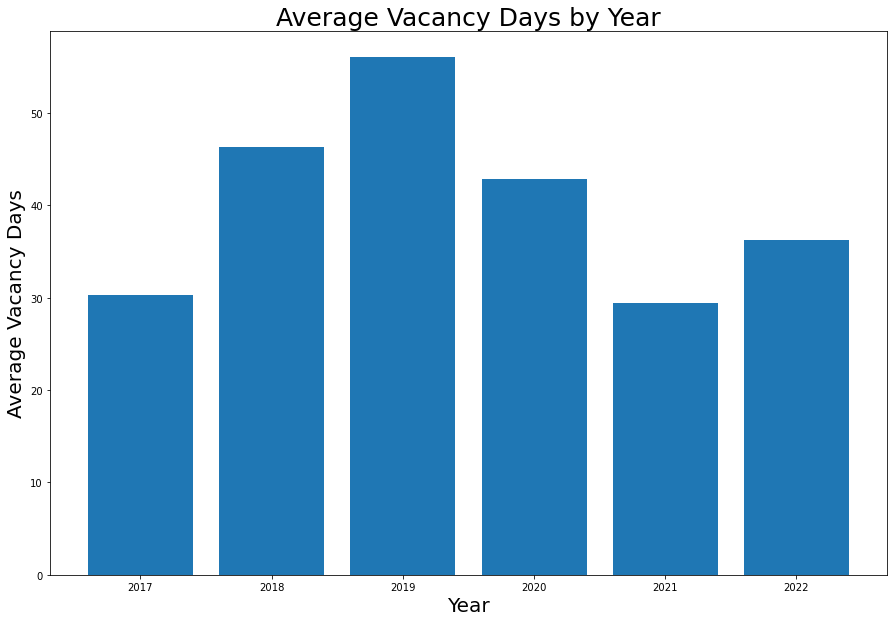

In [87]:
#Plotting
plt.figure(figsize=(15, 10))
plt.bar(year_groupby.index, year_groupby['Average VAC'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.title('Average Vacancy Days by Year', fontsize=25)
plt.show()

In [59]:
#Copy of data
copy_year_groupby = year_groupby.copy()
#Percentage change with previous year
prc_change = copy_year_groupby.pct_change()
prc_change

,Avg UnTenantable,Avg Tenantable,Average VAC,Vacancy Count
Year,,,,
2017,NaN,NaN,NaN,NaN
2018,0.285973,0.722307,0.528803,1.063728
2019,0.266562,0.174937,0.209117,0.001224
2020,-0.154552,-0.287845,-0.235760,-0.056386
2021,-0.229245,-0.378996,-0.314261,-0.291289
2022,0.375977,0.097580,0.232846,-0.671475


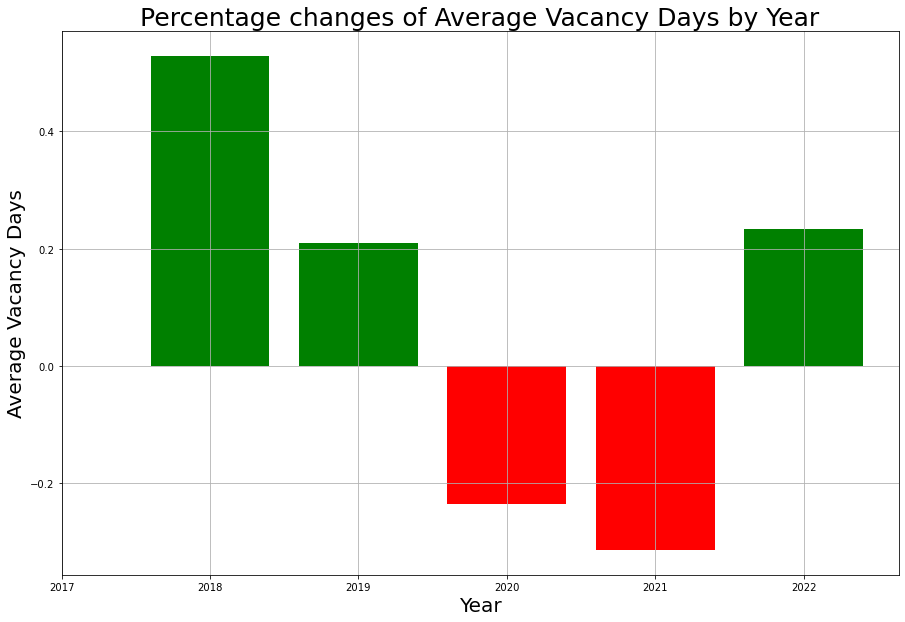

In [78]:
plt.figure(figsize=(15, 10))
mask1 = prc_change['Average VAC'].values < 0
mask2 = prc_change['Average VAC'].values >= 0
plt.bar(prc_change['Average VAC'].index[mask1], prc_change['Average VAC'][mask1],color = 'r')
plt.bar(prc_change['Average VAC'].index[mask2], prc_change['Average VAC'][mask2],color = 'g')
plt.xlabel('Year', fontsize=20)
plt.xticks(prc_change['Average VAC'].index)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.title('Percentage changes of Average Vacancy Days by Year', fontsize=25)
plt.grid()
plt.show()

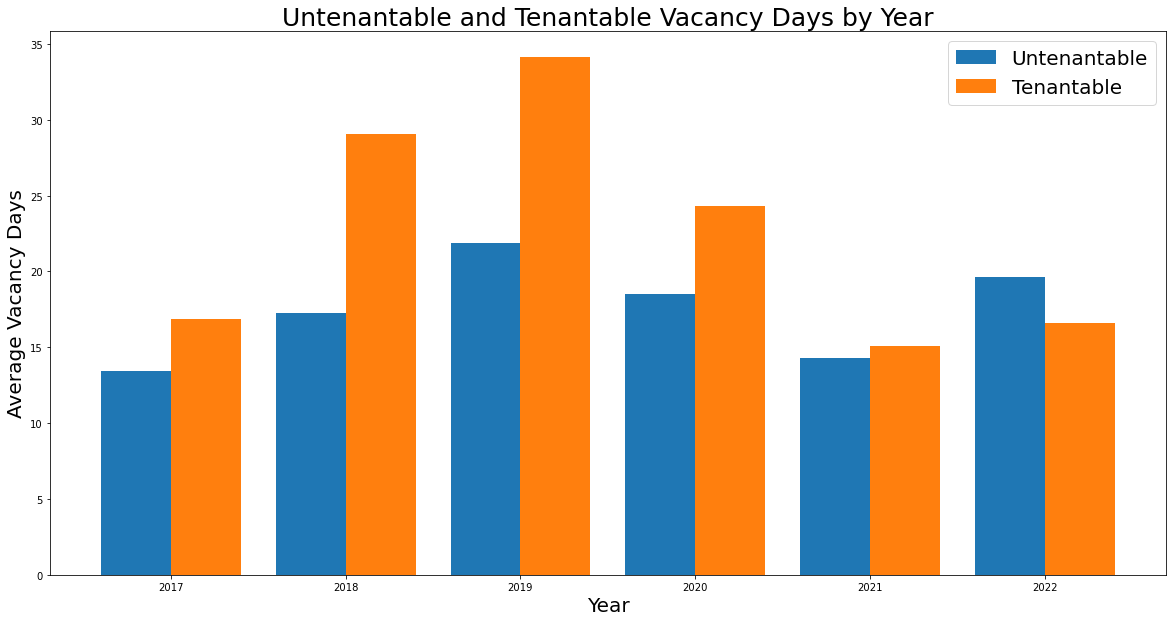

In [77]:
#Plotting
plt.figure(figsize=(20, 10))
x_axis=np.arange(len(year_groupby.index))
plt.bar(x_axis - 0.2, year_groupby['Avg UnTenantable'], 0.4, label = 'Untenantable')
plt.bar(x_axis + 0.2, year_groupby['Avg Tenantable'], 0.4, label = 'Tenantable')
plt.xticks(x_axis, year_groupby.index)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.title('Untenantable and Tenantable Vacancy Days by Year', fontsize=25)
plt.legend(fontsize=20)
plt.show()


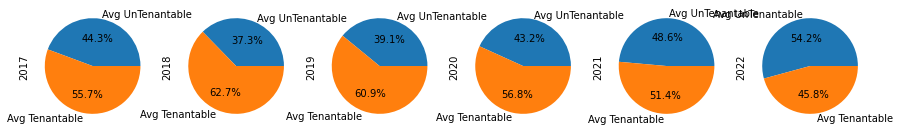

In [17]:
pie_df=year_groupby[['Avg UnTenantable', 'Avg Tenantable']]
pie_df.T.plot.pie(subplots=True, figsize=(15, 10), autopct='%1.1f%%', legend= False)
#plt.legend(bbox_to_anchor=(1, 1), fontsize=8)
plt.show()

In [62]:
#Groupby by number of bedrooms
rooms_groupby = df.groupby(by='Bedrooms',as_index=True).agg({'TotalVAC': ['mean', 'count']})#['TotalVAC'].mean()
rooms_groupby

TotalVAC       
               mean  count
Bedrooms                  
1         40.227935  12350
2         45.460797   9234
3         43.713251   8143
4         40.449204   1821
5         77.989418    189
6         23.125000     16
7         14.000000      4

In [66]:
rooms_groupby['TotalVAC']['mean']

Bedrooms
1    40.227935
2    45.460797
3    43.713251
4    40.449204
5    77.989418
6    23.125000
7    14.000000
Name: mean, dtype: float64

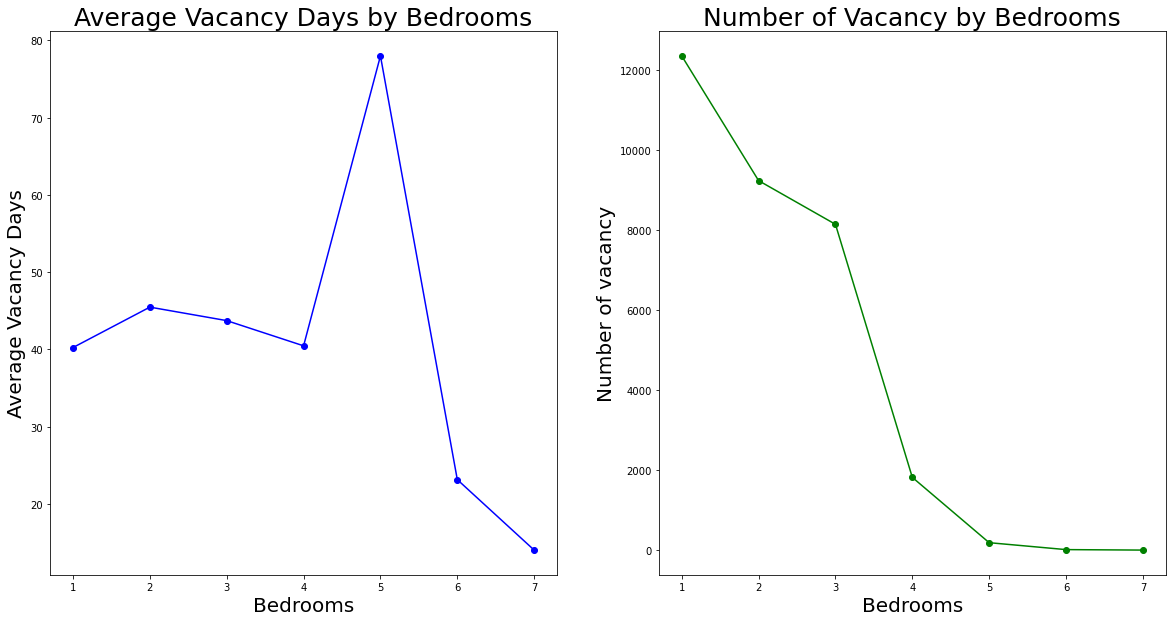

In [75]:
#Plotting
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(rooms_groupby.index, rooms_groupby['TotalVAC']['mean'], 'bo-')
plt.title('Average Vacancy Days by Bedrooms', fontsize=25)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)


plt.subplot(1, 2, 2)
plt.plot(rooms_groupby.index, rooms_groupby['TotalVAC']['count'], 'go-')
plt.title('Number of Vacancy by Bedrooms', fontsize=25)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Number of vacancy', fontsize=20)

plt.show()

Shows a clear downward trend with the increasing bedroom number, but 5 bedroom type shows diffrent. Lets investigate more.

In [20]:
#Group by rental unit type
type_groupby = df.groupby(by=['Bedrooms','RentalUnitDesc'],as_index=False)['TotalVAC'].mean()
#Create a pivot table of bedroom and rental unit type
bed_type = type_groupby.pivot(index='Bedrooms', columns='RentalUnitDesc', values='TotalVAC').reset_index()
bed_type.set_index('Bedrooms', inplace=True)
bed_type

RentalUnitDesc,Apartment,Attached Housing,Cluster Housing,Detached House,Dual Occupancy,Duplex,Senior Unit,Townhouse
Bedrooms,,,,,,,,
1,39.945713,39.886266,43.703488,37.627835,36.534884,39.028520,43.354783,NaN
2,45.895419,34.709372,46.369427,43.166151,57.923913,59.565056,48.144427,52.666667
3,33.235404,37.260695,38.884868,52.359060,61.508475,39.209549,35.423932,60.000000
4,33.019565,31.972028,37.900000,50.896296,38.923077,38.602410,26.969466,NaN
5,48.220000,18.846154,12.666667,124.724138,8.000000,37.000000,33.400000,NaN
6,7.666667,38.000000,NaN,29.875000,NaN,30.000000,13.333333,NaN
7,14.000000,NaN,NaN,NaN,NaN,14.000000,NaN,NaN


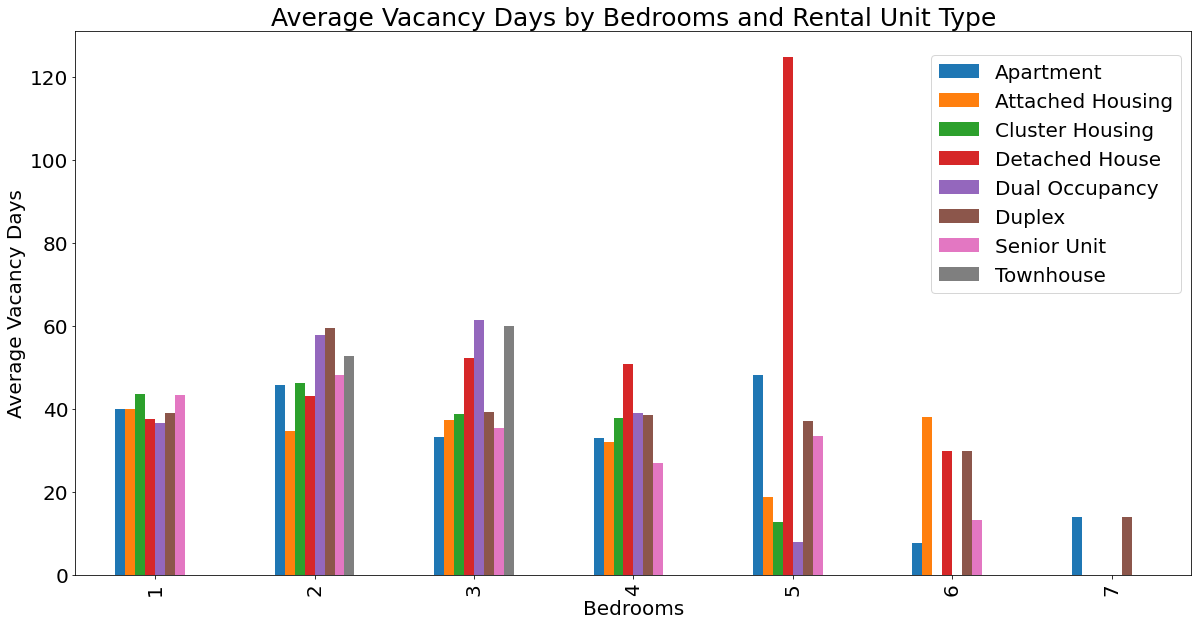

In [88]:
#Plotting
bed_type.plot.bar(figsize=(20,10), fontsize=20,linewidth=10)
plt.title('Average Vacancy Days by Bedrooms and Rental Unit Type', fontsize=25)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.5),fontsize=20)

plt.show()

5 Bedroom Detached House's Total Vacancy days count is weirdly high. Lets find the outliers.

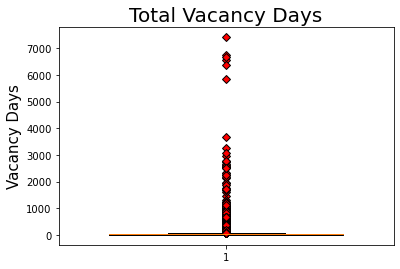

In [94]:
# Generate a box plot of the 5 Bed Detached House Vacancy Days
#Variable to change the colour of the potential outlier in boxplot
red_diamond = dict(markerfacecolor='r', marker='D')
# Generate a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Total Vacancy Days', fontsize=20)
ax1.set_ylabel('Vacancy Days', fontsize=15)
#ax1.set_xlabel('')
ax1.boxplot(df['TotalVAC'], flierprops=red_diamond, widths = .7, vert=True)
plt.show()

In [26]:
# Calculate the IQR and 
# quantitatively determine if there are any potential outliers. 
def quartiles(df):
    quartiles = df.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Determine outliers using upper and lower bounds
    outliers = df.loc[(df< lower_bound) | (df > upper_bound)]
    outliers.sort_values(inplace=True, ascending=False)
    if len(outliers) > 0:
        print(f'Potential outlier are: \n{outliers}')
    print("--------------------------------------------------")
    return outliers

outliers1 = quartiles(df['TotalVAC'])

Potential outlier are: 
13838    7412
13321    6741
15932    6659
6925     6570
14014    6370
         ... 
7174       82
6859       82
6808       82
5292       82
11         82
Name: TotalVAC, Length: 2717, dtype: int64
--------------------------------------------------


In [28]:
#Drop all outliers
new_df1 = df.drop(outliers1.index)
#Drop unwanted columns
new_df1 = new_df1.drop(columns= 'Unnamed: 0')
#Groupby by bedrooms
rooms_groupby = new_df1.groupby(by='Bedrooms',as_index=False)['TotalVAC'].mean()
new_df1.head()


,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


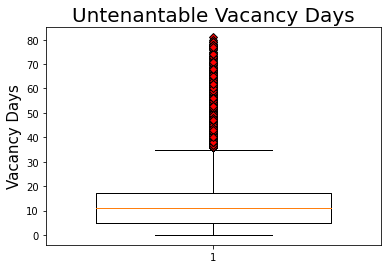

In [97]:
# Generate a box plot of the 5 Bed Detached House Vacancy Days
#Variable to change the colour of the potential outlier in boxplot
red_diamond = dict(markerfacecolor='r', marker='D')
# Generate a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Untenantable Vacancy Days', fontsize=20)
ax1.set_ylabel('Vacancy Days', fontsize=15)
#ax1.set_xlabel('')
ax1.boxplot(new_df1['VUDays'], flierprops=red_diamond, widths = .7, vert=True)
plt.show()

In [30]:
#Find the outliers
outliers2 = quartiles(new_df1['VUDays'])

Potential outlier are: 
6844     81
12910    80
17371    79
14999    79
19936    79
         ..
26557    36
7637     36
26558    36
26559    36
26560    36
Name: VUDays, Length: 1529, dtype: int64
--------------------------------------------------


In [31]:
#Drop all outliers
new_df2 = new_df1.drop(outliers2.index)
#Drop unwanted columns
#newer_df = newer_df.drop(columns= 'Unnamed: 0')
#Groupby by bedrooms
# rooms_groupby = new_df2.groupby(by='Bedrooms',as_index=False)['TotalVAC'].mean()
new_df2.head()

,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


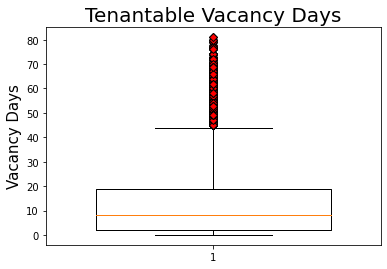

In [98]:
# Generate a box plot of the 5 Bed Detached House Vacancy Days
#Variable to change the colour of the potential outlier in boxplot
red_diamond = dict(markerfacecolor='r', marker='D')
# Generate a box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tenantable Vacancy Days', fontsize=20)
ax1.set_ylabel('Vacancy Days', fontsize=15)
#ax1.set_xlabel('')
ax1.boxplot(new_df2['VTDays'], flierprops=red_diamond, widths = .7, vert=True)
plt.show()

In [33]:
#Find the outliers
outliers3 = quartiles(new_df2['VTDays'])

Potential outlier are: 
31338    81
15785    81
27329    80
23806    80
5241     80
         ..
11038    45
20088    45
11031    45
10889    45
17106    45
Name: VTDays, Length: 1311, dtype: int64
--------------------------------------------------


In [99]:
#Drop all outliers
new_df2 = new_df1.drop(outliers2.index)
#Drop unwanted columns
#newer_df = newer_df.drop(columns= 'Unnamed: 0')
#Groupby by bedrooms
rooms_groupby = new_df2.groupby(by='Bedrooms',as_index=True).agg({'TotalVAC': ['mean', 'count']})#['TotalVAC'].mean()
new_df2.head()

,Postcode,Bedrooms,RentalUnitDesc,VUDate,VTDate,TENDate,RUUseType,HousingServiceCentre,VUDays,VTDays,TotalVAC,LGA,StateElectorate,Year,Month
0,4032,3,Detached House,9/10/2017,2/11/2017,3/11/2017,Public Housing,105,24,1,25,BRISBANE,STAFFORD,2017,2017-11
1,4108,2,Detached House,3/04/2018,18/04/2018,2/05/2018,Public Housing,107,15,14,29,BRISBANE,TOOHEY,2018,2018-05
2,4108,2,Detached House,1/08/2017,11/08/2017,21/08/2017,Public Housing,107,10,10,20,BRISBANE,TOOHEY,2017,2017-08
3,4108,2,Detached House,1/03/2018,23/03/2018,28/03/2018,Public Housing,107,22,5,27,BRISBANE,TOOHEY,2018,2018-03
4,4108,2,Detached House,15/11/2017,1/12/2017,2/01/2018,Public Housing,107,16,32,48,BRISBANE,TOOHEY,2018,2018-01


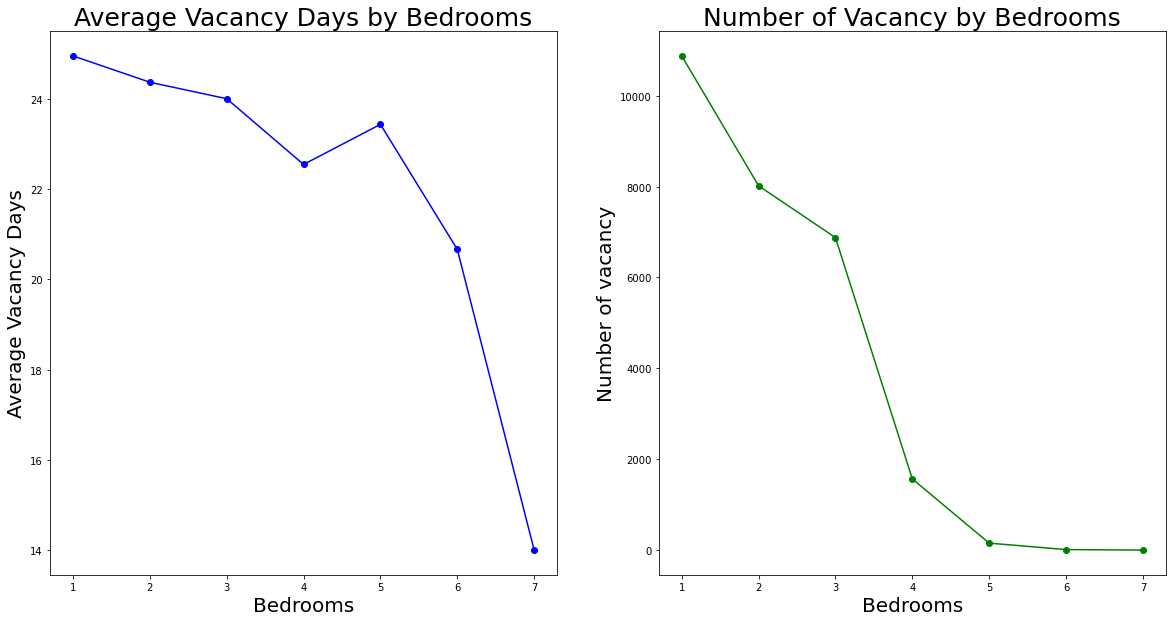

In [100]:
#Plotting
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(rooms_groupby.index, rooms_groupby['TotalVAC']['mean'], 'bo-')
plt.title('Average Vacancy Days by Bedrooms', fontsize=25)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)


plt.subplot(1, 2, 2)
plt.plot(rooms_groupby.index, rooms_groupby['TotalVAC']['count'], 'go-')
plt.title('Number of Vacancy by Bedrooms', fontsize=25)
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Number of vacancy', fontsize=20)

plt.show()

In [36]:
#Groupby by Month
months_groupby = new_df2.groupby(by='Month',as_index=False).agg({'VUDays':'mean', 'VTDays':'mean', 'TotalVAC':'mean', 'LGA': 'count'})#[['VUDays', 'VTDays', 'TotalVAC']].mean()
months_groupby = months_groupby.rename(columns= {'LGA':'Vacancy Count', 'TotalVAC':'Average VAC'})
months_groupby.head()

,Month,VUDays,VTDays,Average VAC,Vacancy Count
0,2017-07,9.886477,12.821369,22.707846,599
1,2017-08,10.469136,12.029982,22.499118,567
2,2017-09,10.792115,11.071685,21.863799,558
3,2017-10,10.346062,12.548926,22.894988,419
4,2017-11,10.653418,11.222576,21.875994,629


In [37]:
#Groupby by Month
year_groupby = new_df2.groupby(by='Year',as_index=False).agg({'VUDays':'mean', 'VTDays':'mean', 'TotalVAC':'mean', 'LGA': 'count'})#[['VUDays', 'VTDays', 'TotalVAC']].mean()
year_groupby = year_groupby.rename(columns= {'LGA':'Vacancy Count', 'TotalVAC':'Average VAC'})
year_groupby.head()

,Year,VUDays,VTDays,Average VAC,Vacancy Count
0,2017,10.503913,11.917520,22.421433,3322
1,2018,12.114621,13.035402,25.150024,6299
2,2019,11.332093,14.314452,25.646545,6179
3,2020,9.883681,13.459117,23.342798,5846
4,2021,10.786467,12.683173,23.469639,4463


In [103]:
months_groupby.dtypes

Month             object
VUDays           float64
VTDays           float64
Average VAC      float64
Vacancy Count      int64
dtype: object

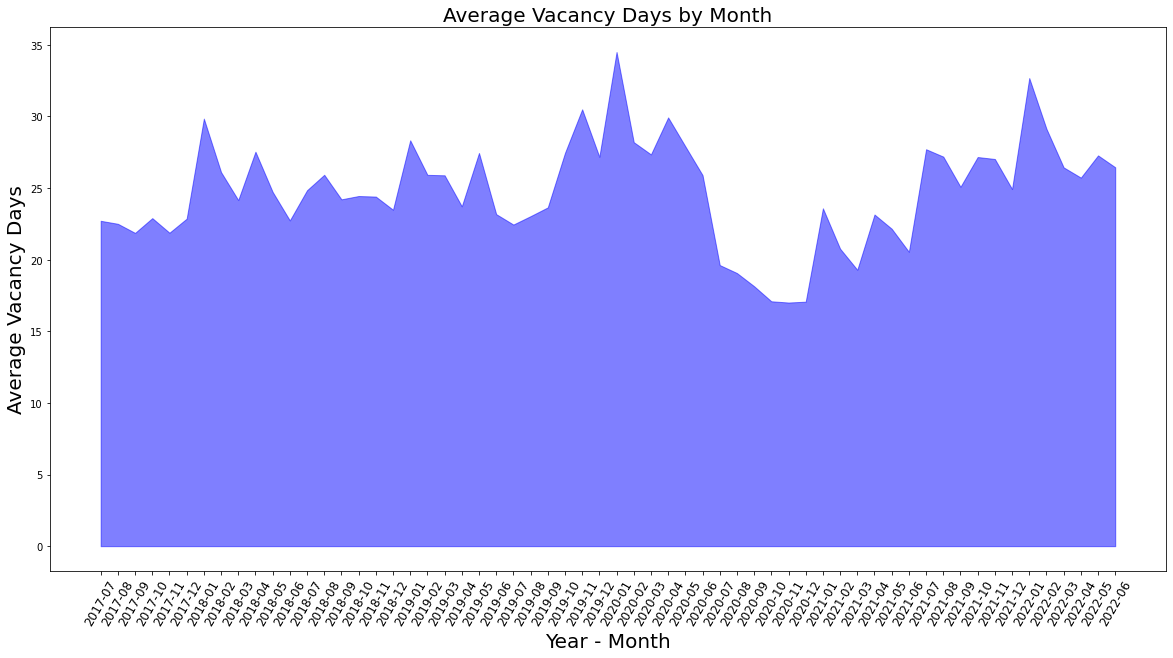

In [101]:
#Plotting
plt.figure(figsize=(20,10))
plt.fill_between(months_groupby['Month'], months_groupby['Average VAC'], color='blue', alpha=0.5)
plt.xlabel('Year - Month', fontsize=20)
plt.ylabel('Average Vacancy Days', fontsize=20)
plt.title('Average Vacancy Days by Month', fontsize=25)
plt.xticks(rotation=60, fontsize=12)
plt.show()

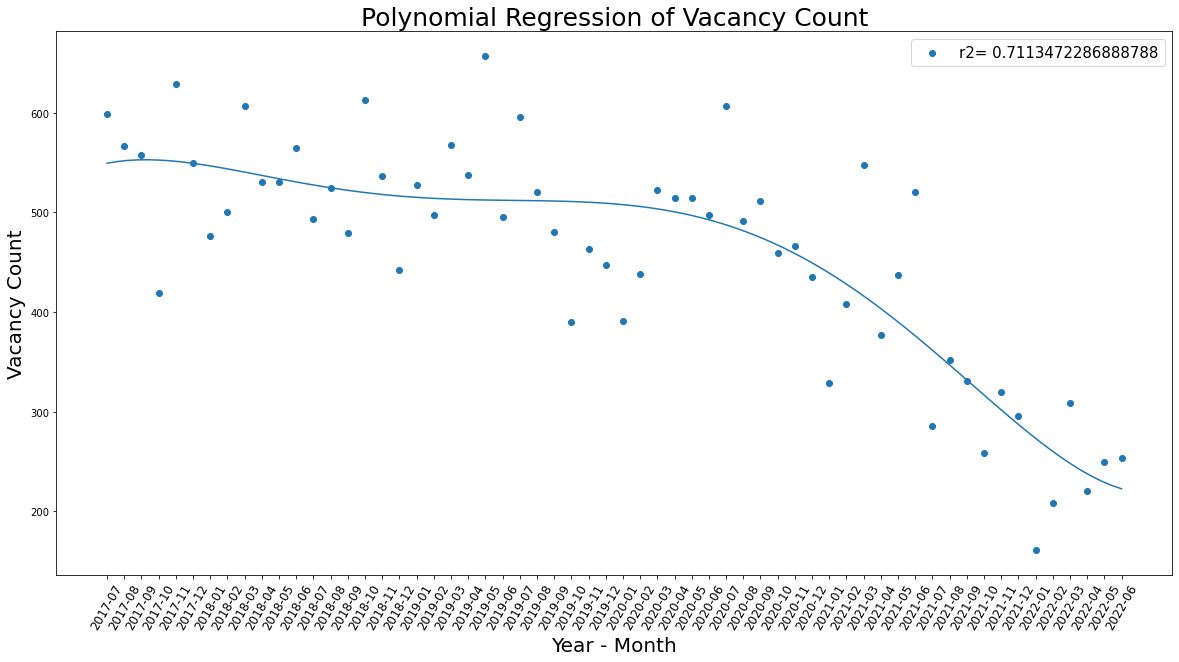

In [143]:
from sklearn.metrics import r2_score

x_ticks= months_groupby['Month'].to_list()
y= months_groupby['Vacancy Count'].to_list()
x=list(range(1, len(y)+1))
mymodel = np.poly1d(np.polyfit(x, y, 5))

myline = np.linspace(1, 60, 100)

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.xticks(x, x_ticks, rotation=60, fontsize=12)
plt.xlabel('Year - Month', fontsize=20)
plt.ylabel('Vacancy Count', fontsize=20)
plt.title('Polynomial Regression of Vacancy Count', fontsize=25)
plt.legend([f'r2= {r2_score(y, mymodel(x))}'], loc='upper right', fontsize=15)
plt.plot(myline, mymodel(myline))
plt.show()

In [40]:
#Read Covid csv
covid_df = pd.read_csv('raw_data\opendata_qld_covidcase_loc.csv')
covid_df.head()
#Create a new columns for year and month
Months = []
Year = []
date_splited = []
#Convert date string to year and month
dates = pd.Series(covid_df['NOTIFICATION_DATE'])
for date in dates:
    if '/' in date:
        date_splited = date.split('/')
        Months.append(f'{date_splited[2]}-{date_splited[1]}')
        Year.append(date_splited[2])
    elif '-' in date:
        date_splited = date.split('-')
        Months.append(date_splited[0].strip())
        Year.append(date_splited[0].strip())
    else:
        Months.append(date)
        Year.append(date)

covid_df['Month'] = Months
covid_df['Year'] = Year
covid_df.head()

,NOTIFICATION_DATE,HHS,POSTCODE,LGA_NAME,SOURCE_INFECTION,SA2_CODE,SA2_REGION,Month,Year
0,28/01/2020,GOLD COAST,NaN,NaN,Overseas Acquired,NaN,NaN,2020-01,2020
1,30/01/2020,GOLD COAST,NaN,NaN,Overseas Acquired,NaN,NaN,2020-01,2020
2,04/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02,2020
3,04/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02,2020
4,06/02/2020,GOLD COAST,NaN,NaN,Locally acquired - contact of confirmed case a...,NaN,NaN,2020-02,2020


In [41]:
#Groupby Covid cases count by month
covid_groupby = covid_df.groupby(by='Month',as_index=False)['NOTIFICATION_DATE'].count()
covid_groupby = covid_groupby.rename(columns={'NOTIFICATION_DATE':'Covid Cases'})
covid_groupby.head(20)

,Month,Covid Cases
0,2020-01,2
1,2020-02,7
2,2020-03,816
3,2020-04,211
4,2020-05,28
5,2020-06,9
6,2020-07,22
7,2020-08,40
8,2020-09,33
9,2020-10,14


In [42]:
#Merge two dataframes
merged_df = pd.merge(months_groupby, covid_groupby, on = "Month", how = "left")
merged_df.tail(20)

,Month,VUDays,VTDays,Average VAC,Vacancy Count,Covid Cases
40,2020-11,7.047210,9.957082,17.004292,466,33.0
41,2020-12,7.289655,9.774713,17.064368,435,51.0
42,2021-01,10.206687,13.373860,23.580547,329,55.0
43,2021-02,10.002451,10.759804,20.762255,408,22.0
44,2021-03,8.279197,11.010949,19.290146,548,143.0
45,2021-04,10.026525,13.119363,23.145889,377,90.0
46,2021-05,9.231121,12.924485,22.155606,437,69.0
47,2021-06,8.434615,12.109615,20.544231,520,81.0
48,2021-07,12.248252,15.454545,27.702797,286,105.0
49,2021-08,14.522727,12.664773,27.187500,352,175.0


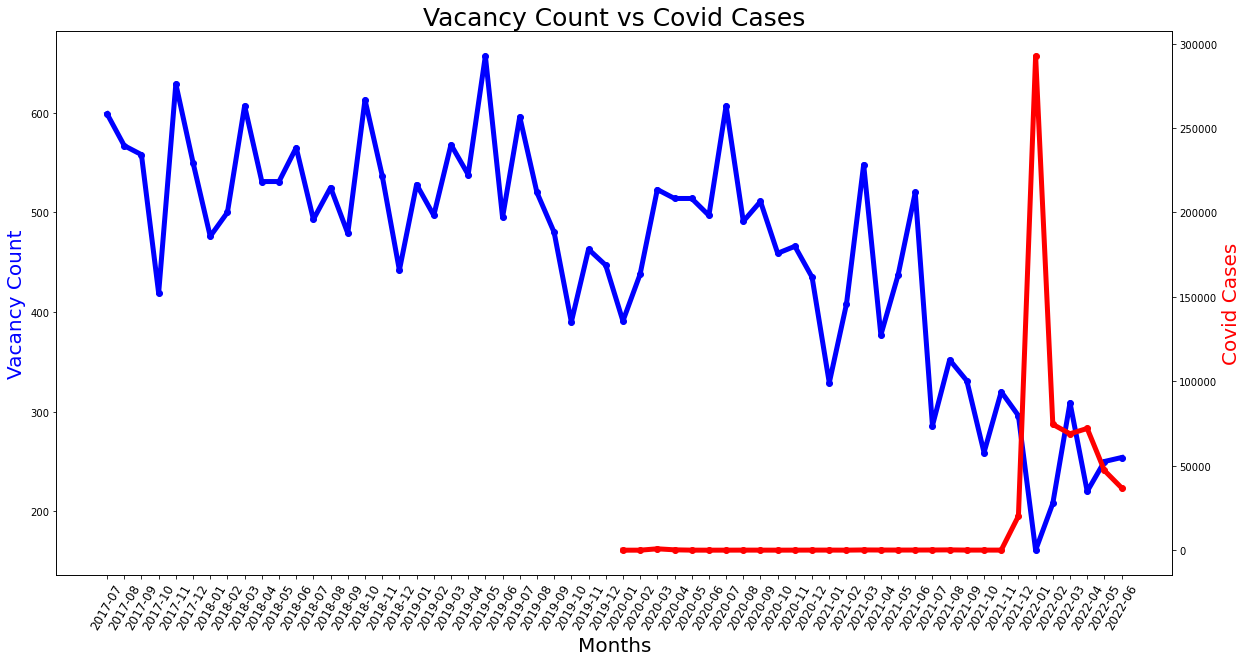

In [149]:
#Plotting time series of average vacancy days and covid cases
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 10])

# Plotting the firts line with ax axes
ax.plot(merged_df['Month'],
        merged_df['Vacancy Count'],
        color='b', linewidth=5, marker='o')
plt.xticks(rotation=60, fontsize=12)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Vacancy Count',  color='blue', fontsize=20)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(merged_df['Month'],
         merged_df['Covid Cases'],
         color='red', linewidth=5, marker='o')

ax2.set_ylabel('Covid Cases', color='red', fontsize=20)
plt.title('Vacancy Count vs Covid Cases', fontsize=25)

plt.show()

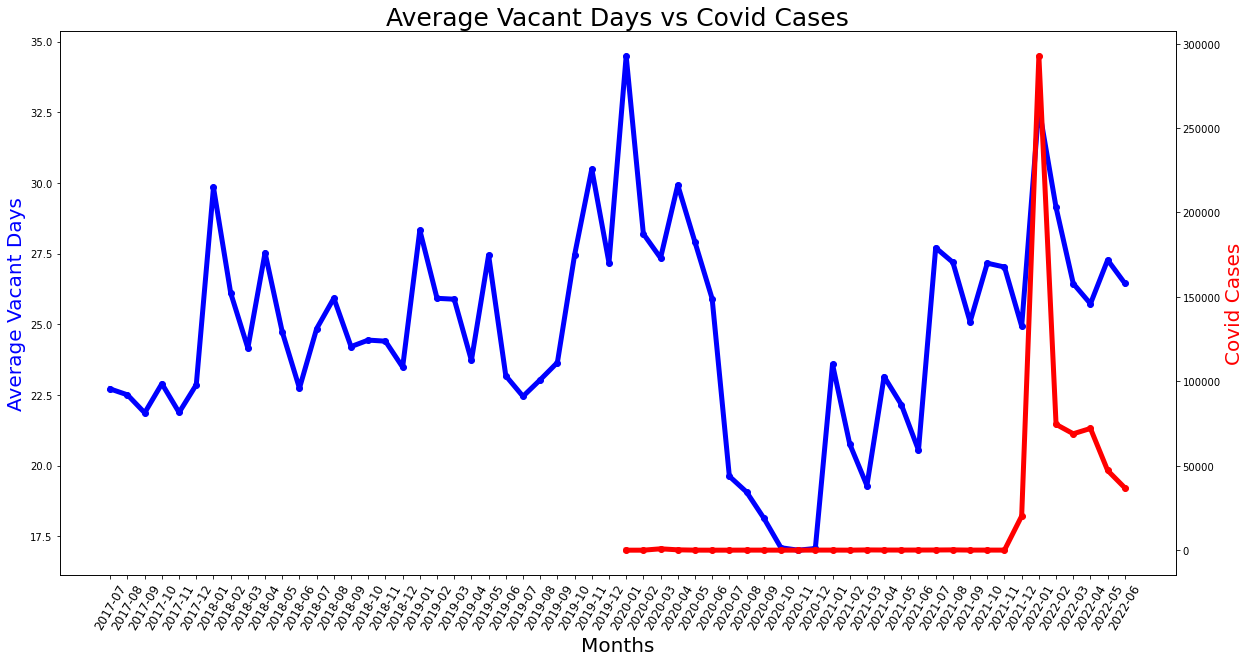

In [150]:
#Plotting time series of average vacancy days and covid cases
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 10])

# Plotting the firts line with ax axes
ax.plot(merged_df['Month'],
        merged_df['Average VAC'],
        color='b', linewidth=5, marker='o')
plt.xticks(rotation=60, fontsize=12)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Average Vacant Days',  color='blue', fontsize=20)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(merged_df['Month'],
         merged_df['Covid Cases'],
         color='red', linewidth=5, marker='o')

ax2.set_ylabel('Covid Cases', color='red', fontsize=20)
plt.title('Average Vacant Days vs Covid Cases', fontsize=25)

plt.show()

In [44]:
#Groupby Covid cases count by month
covid_year_groupby = covid_df.groupby(by='Year',as_index=False)['NOTIFICATION_DATE'].count()
covid_year_groupby = covid_year_groupby.rename(columns={'NOTIFICATION_DATE':'Covid Cases'})
covid_year_groupby['Year'] = covid_year_groupby['Year'].astype(int)
copy_year_groupby

,Avg UnTenantable,Avg Tenantable,Average VAC,Vacancy Count
Year,,,,
2017,13.441606,16.868052,30.309657,3562
2018,17.285539,29.051966,46.337505,7351
2019,21.893207,34.134239,56.027446,7360
2020,18.509575,24.308855,42.818431,6945
2021,14.266355,15.095896,29.362251,4922
2022,19.630179,16.568955,36.199134,1617


In [45]:
#Merge two dataframes
merged_df2 = pd.merge(year_groupby, covid_year_groupby, on = "Year", how = "left")
merged_df2

,Year,VUDays,VTDays,Average VAC,Vacancy Count,Covid Cases
0,2017,10.503913,11.917520,22.421433,3322,NaN
1,2018,12.114621,13.035402,25.150024,6299,NaN
2,2019,11.332093,14.314452,25.646545,6179,NaN
3,2020,9.883681,13.459117,23.342798,5846,1266.0
4,2021,10.786467,12.683173,23.469639,4463,21093.0
5,2022,14.342368,13.248217,27.590585,1402,714485.0


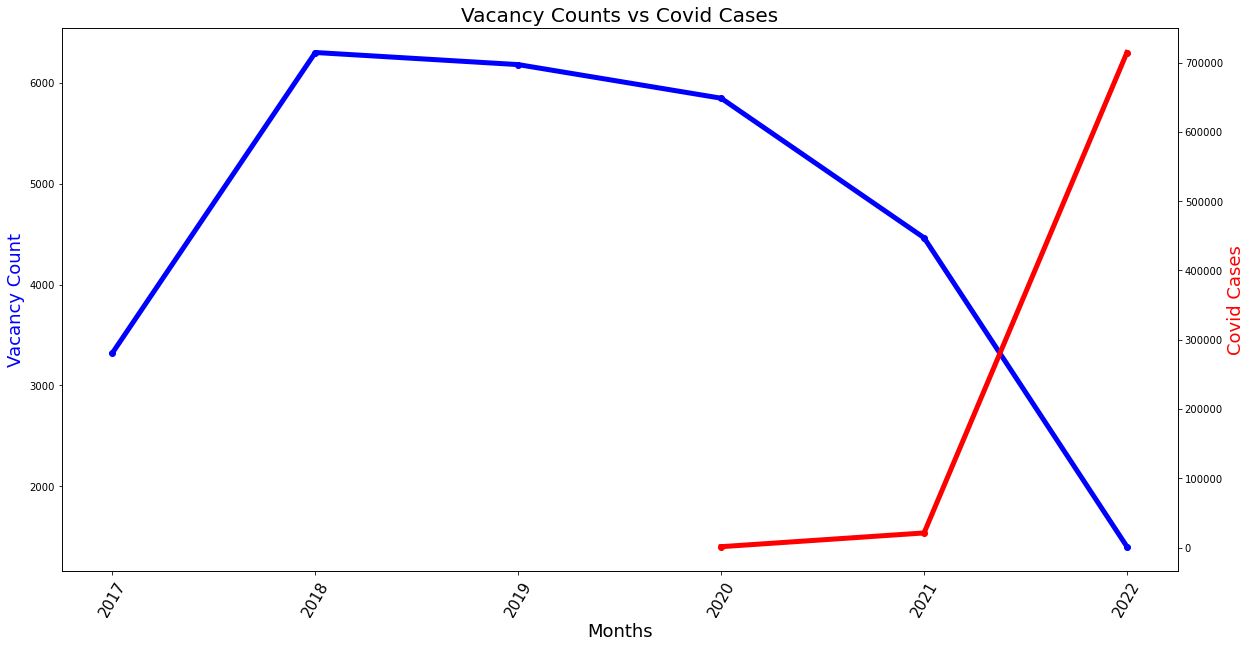

In [50]:
#Plotting time series of average vacancy days and covid cases
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[20, 10])

# Plotting the firts line with ax axes
ax.plot(merged_df2['Year'],
        merged_df2['Vacancy Count'],
        color='b', linewidth=5, marker='o')
plt.xticks(rotation=60, fontsize=15)
ax.set_xlabel('Months', fontsize=18)
ax.set_ylabel('Vacancy Count',  color='blue', fontsize=18)

# Create a twin axes ax2 using twinx() function
ax2 = ax.twinx()

# Now, plot the second line with ax2 axes
ax2.plot(merged_df2['Year'],
         merged_df2['Covid Cases'],
         color='red', linewidth=5, marker='o')

ax2.set_ylabel('Covid Cases', color='red', fontsize=18)
plt.title('Vacancy Counts vs Covid Cases', fontsize=20)

plt.show()